In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [3]:
#dataset of Hurricane Michael plot points
location = "datasets/hurricaneMichael.csv"


#load data into dataframe
#seperator between values in file is a semicolon
HurricaneMichael_df = pd.read_csv(location, sep=",")
HurricaneMichael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [4]:
HurricaneMichael_df['Long'] = 0 - HurricaneMichael_df['Long']

In [5]:
HurricaneMichael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [29]:
HurricaneMichael_df.dtypes


AdvisoryNumber      object
Date                object
Lat                float64
Long               float64
Wind                 int64
Pres                 int64
Movement            object
Type                object
Name                object
Received            object
Forecaster          object
coordinates       geometry
dtype: object

In [27]:
HurricaneMichael_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
coordinates       45
dtype: int64

In [7]:
#make a new column to hold the longitude & latitude as a list
HurricaneMichael_df['coordinates'] = list(HurricaneMichael_df[['Long', 'Lat']].values)

In [8]:
HurricaneMichael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,"[-87.1, 18.4]"
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,"[-86.9, 18.6]"


In [10]:
HurricaneMichael_df['coordinates'].dtypes

dtype('O')

In [11]:
#convert the coordinates to a geolocation type
HurricaneMichael_df['coordinates'] = HurricaneMichael_df['coordinates'].apply(Point)

In [12]:
HurricaneMichael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)


In [14]:
type(HurricaneMichael_df['coordinates'])

pandas.core.series.Series

In [15]:
#import file that contains a USA map shape polygons
#will use to plot the coordinates of Hurricane Michael plot points
filepath = "datasets/US_states(5m).json"

In [16]:
#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [17]:
map48_df = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

In [18]:
map48_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


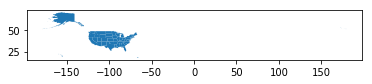

In [19]:
#map graph of all 50 states & Puerto Rico
map_df.plot()

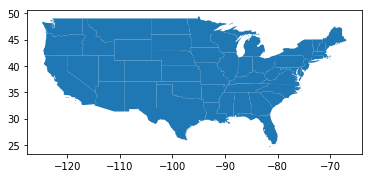

In [21]:
#map graph of all 48 contiguous states (excl. Alaska, Hawaii & Puerto Rico)
map48_df.plot()

In [22]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_HurricaneMichael = gpd.GeoDataFrame(HurricaneMichael_df, geometry='coordinates')

In [23]:
#geo-dataframe looks the same as regular dataframe
geo_HurricaneMichael.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.60000 18.00000)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.60000 18.30000)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.60000 18.80000)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.10000 18.40000)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000 18.60000)


In [24]:
#verify coordinates column is geolocation data type
type(geo_HurricaneMichael['coordinates'])

geopandas.geoseries.GeoSeries

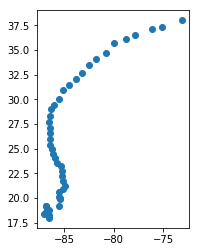

In [31]:
#plot the coordinates (no map)
geo_HurricaneMichael.plot()

Text(0.5, 1.0, 'Path of Hurricane Michael - October 2018 - Category 5')

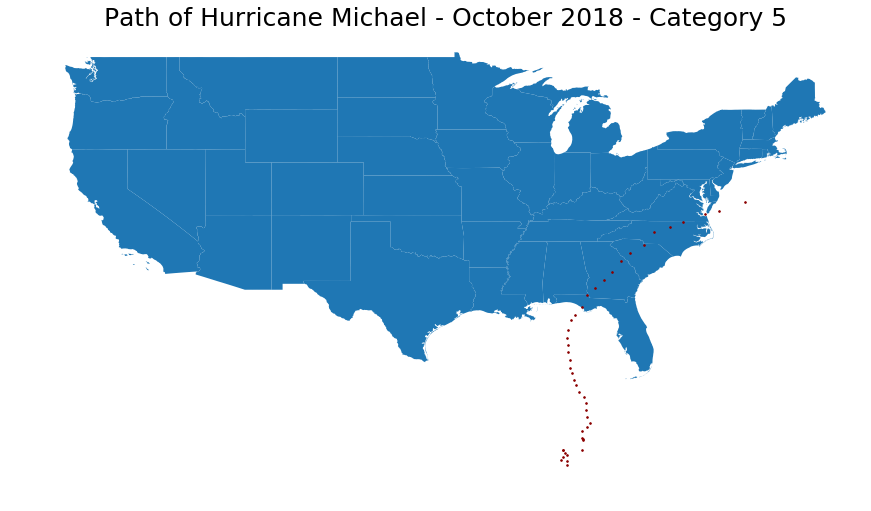

In [26]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48_df.plot(ax=ax)

#plot coordinates on top of map graph
geo_HurricaneMichael.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Path of Hurricane Michael - October 2018 - Category 5", fontsize=25, fontweight=3)